### Circle Detection with Hough Circle Transform

In [1]:
import numpy as np
import cv2

In [3]:
img = cv2.imread('./data/smarties.png')
output = img.copy()

In [4]:
print(img.shape)

(356, 413, 3)


(x - x_center)^2 + (y - y_center)^2 = r^2 \
where (x_center, y_center) is the center of the circle, and r is the radius of the circle

In [5]:
#convert to grayscale image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [6]:
#houghcircle() works better with blurred image so we will blur the gray image
#medianBlur(src, ksize[, dst])
blurred = cv2.medianBlur(gray, 5)

In [7]:
#apply houghcircles method to blurred image
#HoughCircles(image, method, dp, minDist[, circles[, param1[, param2[, minRadius[, maxRadius]]]]])
circles = cv2.HoughCircles(blurred,
                          cv2.HOUGH_GRADIENT,
                          dp = 1,
                          minDist = 20,
                          param1 = 50,
                          param2 = 30,
                          minRadius = 0,
                          maxRadius = 0)

circles = cv2.HoughCircles(image, method, dp, minDist[, circles[, param1[, param2[, minRadius[, maxRadius]]]]]) \
 \
image: 8 bit, single-channel, grayscale input image \
 \
circles: output vector of found circles \
 \
method: detection method, see HoughModes. Currently, the only implemented method is HOUGH_GRADIENT \
 \
dp: Inverse ratio of the accumulator resolution to the image resolution \
 \
minDist: minimum distance between the centers of the detected circles \
 \
param1: first method-specifc param. in case of HOUGH_GRADIENT, it is the higher threshold of the two passed to the canny edge detector. \
 \
param2: Second method-specific param. in case of HOUGH_GRADIENT. it is the accumulator threshold for the circle centers at the detection stage. \
 \
minRadius: minimum circle radius \
 \
maxRadius: maximum circle radius. if <=0, uses the maximum image dimension. if < 0, returns cetners without finding the radius

In [8]:
print(circles)
#returns [x, y, radius]

[[[376.5       81.5       26.6     ]
  [347.5      238.5       26.6     ]
  [293.5      320.5       27.9     ]
  [152.5      271.5       27.1     ]
  [205.5      210.5       26.800001]
  [386.5      169.5       26.4     ]
  [286.5      213.5       25.2     ]
  [ 32.5      230.5       27.5     ]
  [269.5      116.5       25.7     ]
  [ 99.5      259.5       28.1     ]
  [220.5      306.5       27.4     ]
  [134.5      328.5       26.800001]
  [320.5      278.5       67.4     ]]]


In [9]:
#need to turn all values from circles above into ints vs floats
detected_circles = np.uint16(np.around(circles))
print(detected_circles)

[[[376  82  27]
  [348 238  27]
  [294 320  28]
  [152 272  27]
  [206 210  27]
  [386 170  26]
  [286 214  25]
  [ 32 230  28]
  [270 116  26]
  [100 260  28]
  [220 306  27]
  [134 328  27]
  [320 278  67]]]


In [10]:
#loop through detected circles
for x,y,r in detected_circles[0, :]:
    #print(x,y,r)
    #draw the circles
    #circle(img, center, radius, color[, thickness[, lineType[, shift]]])
    cv2.circle(output, (x,y), r, (255,0,0), 2)
    #draw the center point using circle method with th x,y and very small radius.
    cv2.circle(output, (x,y), 1, (0,255,0), 2)
    

In [11]:
cv2.imshow('gray', gray)
cv2.imshow('blurred', blurred)
cv2.imshow('output', output)
cv2.waitKey(0)
cv2.destroyAllWindows()

Works very well except there's 1 random circle thats darw that needs to get taken care of \
It turns out the last poing has a radius of 67.
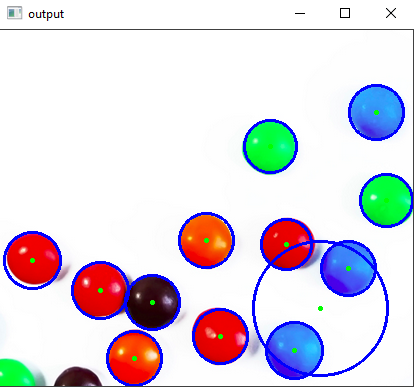

In [2]:
# now we'll do the same for shapes.jpg
shapes = cv2.imread('./data/shapes.jpg')
shapes_output = shapes.copy()

#convert to grayscale image
shapes_gray = cv2.cvtColor(shapes, cv2.COLOR_BGR2GRAY)

#houghcircle() works better with blurred image so we will blur the gray image
#medianBlur(src, ksize[, dst])
shapes_blurred = cv2.medianBlur(shapes_gray, 5)

#apply houghcircles method to blurred image
#HoughCircles(image, method, dp, minDist[, circles[, param1[, param2[, minRadius[, maxRadius]]]]])
shapes_circles = cv2.HoughCircles(shapes_blurred,
                          cv2.HOUGH_GRADIENT,
                          dp = 1,
                          minDist = 20,
                          param1 = 50,
                          param2 = 30,
                          minRadius = 0,
                          maxRadius = 0)

print(shapes_circles)

#need to turn all values from circles above into ints vs floats
shapes_detected_circles = np.uint16(np.around(shapes_circles))
print(shapes_detected_circles)

#loop through detected circles
for x,y,r in shapes_detected_circles[0, :]:
    #print(x,y,r)
    #draw the circles
    #circle(img, center, radius, color[, thickness[, lineType[, shift]]])
    cv2.circle(shapes_output, (x,y), r, (255,0,0), 2)
    #draw the center point using circle method with th x,y and very small radius.
    cv2.circle(shapes_output, (x,y), 1, (0,255,0), 2)
    

cv2.imshow('shapes_gray', shapes_gray)
cv2.imshow('shapes_blurred', shapes_blurred)
cv2.imshow('shapes_output', shapes_output)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[[ 65.5      211.5       44.100002]]]
[[[ 66 212  44]]]


The actual cirlce in this image was not a perfect circle so the resutls aren't perfect either
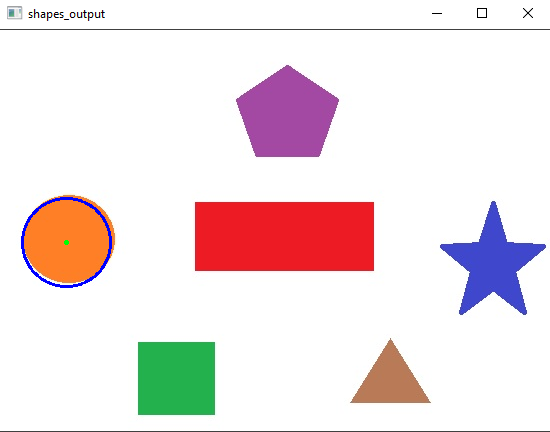